In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [3]:
df['district'].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [5]:
df.corrwith(df['price'],numeric_only=True)

rooms         0.609123
size          0.794788
level         0.079509
max_levels    0.254600
price         1.000000
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [8]:
df.describe()

,rooms,size,level,max_levels,price
count,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,2.578318,70.11898,3.689338,5.992718,54092.074196
std,1.030179,29.32120,2.228360,2.583194,29665.210900
min,1.000000,1.00000,1.000000,1.000000,2.000000
25%,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,3.000000,83.00000,5.000000,9.000000,65000.000000
max,8.000000,279.00000,18.000000,25.000000,220000.000000


In [11]:
df['size'].describe()

count    7278.00000
mean       70.11898
std        29.32120
min         1.00000
25%        50.00000
50%        65.00000
75%        83.00000
max       279.00000
Name: size, dtype: float64

In [12]:
df.isnull().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(1124)

In [14]:
df.groupby('district')['price'].mean()

district
Бектемирский         29462.500000
Мирабадский          81729.538354
Мирзо-Улугбекский    53068.912072
Олмазорский          50229.099237
Сергелийский         43329.559748
Учтепинский          44495.982798
Чиланзарский         45617.487624
Шайхантахурский      63161.626404
Юнусабадский         56106.641086
Яккасарайский        62615.081210
Янгихаётский         37533.333333
Яшнободский          46418.730263
Name: price, dtype: float64

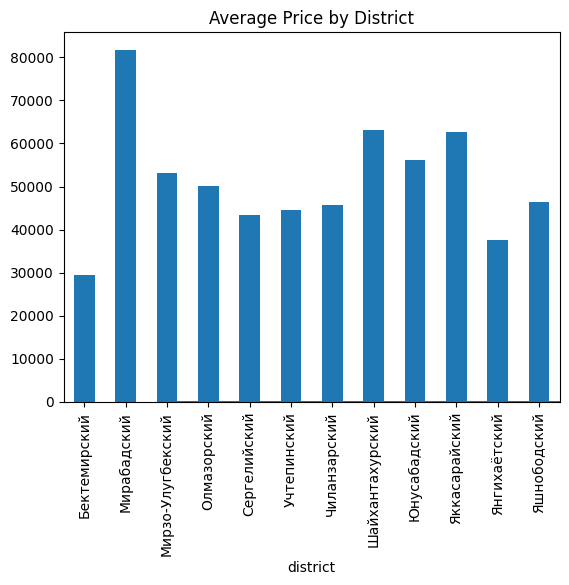

In [15]:
import matplotlib.pyplot as plt
df['price'].hist()
plt.title('Price Distribution')

df.groupby('district')['price'].mean().plot(kind='bar')
plt.title('Average Price by District')
plt.show()


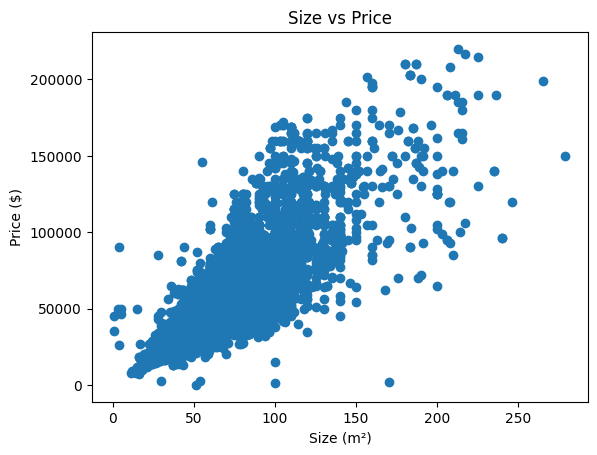

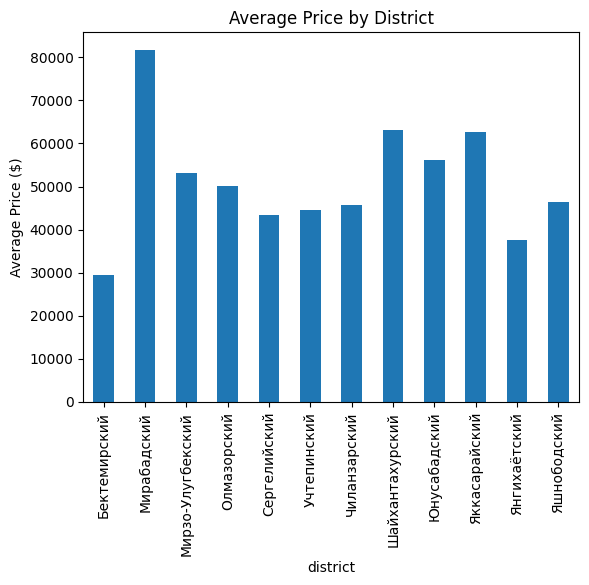

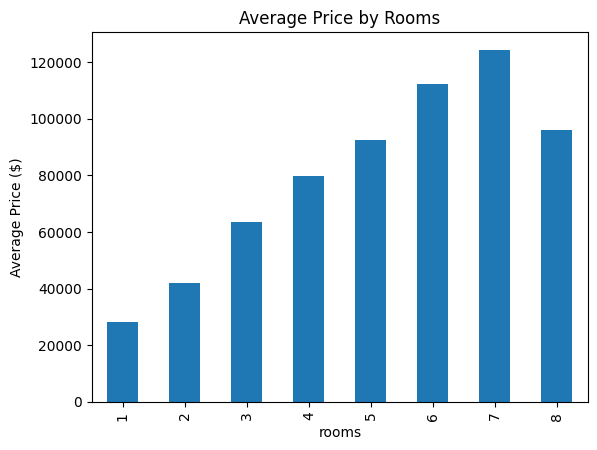

In [16]:
import matplotlib.pyplot as plt

# Narx va o‘lcham orasidagi bog‘liqlik
plt.scatter(df['size'], df['price'])
plt.xlabel('Size (m²)')
plt.ylabel('Price ($)')
plt.title('Size vs Price')
plt.show()

# Har bir tumanga qarab o‘rtacha narx
df.groupby('district')['price'].mean().plot(kind='bar')
plt.title('Average Price by District')
plt.ylabel('Average Price ($)')
plt.show()

# Xonalar soniga qarab o‘rtacha narx
df.groupby('rooms')['price'].mean().plot(kind='bar')
plt.title('Average Price by Rooms')
plt.ylabel('Average Price ($)')
plt.show()


In [18]:
# Har bir turdagi o'rtacha o'lcham 
print(df.groupby('district')['size'].mean())

district
Бектемирский         62.525000
Мирабадский          86.594324
Мирзо-Улугбекский    68.589076
Олмазорский          76.820115
Сергелийский         75.516855
Учтепинский          65.547947
Чиланзарский         61.907834
Шайхантахурский      79.909916
Юнусабадский         72.095797
Яккасарайский        72.990430
Янгихаётский         54.076000
Яшнободский          66.214803
Name: size, dtype: float64


In [20]:
# Eng qimmat uy
print(df.loc[df['price'].idxmax()])

district      Мирзо-Улугбекский
rooms                         5
size                      213.0
level                         5
max_levels                    6
price                  220000.0
Name: 4312, dtype: object


In [35]:
housing = df[df.district == "Чиланзарский"]
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


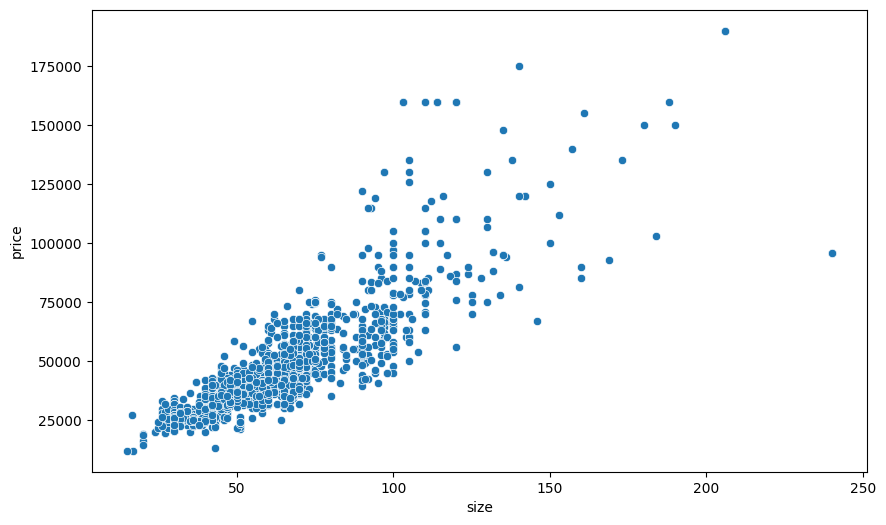

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing,x='size',y='price')
plt.show()

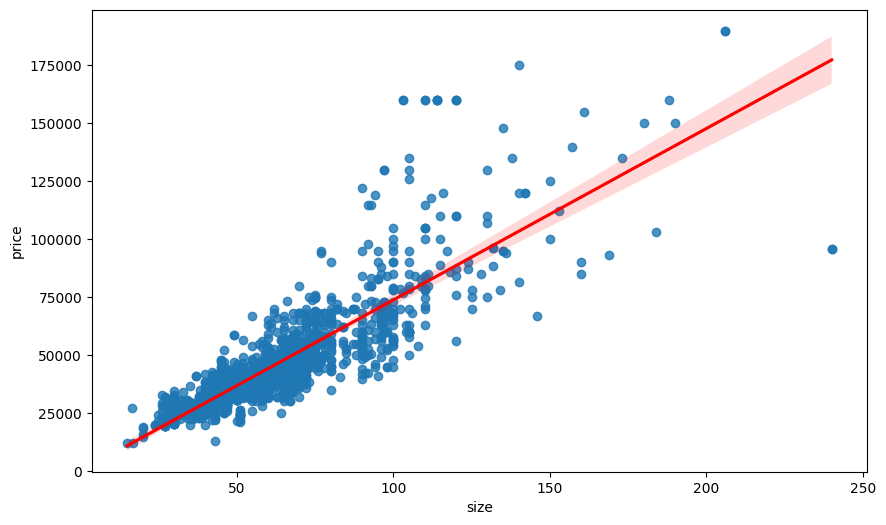

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing,x='size',y='price',line_kws={'color':"red"})
plt.show()

In [25]:
housing.shape

(1616, 6)

In [34]:
housing[['size','price']]

,size,price
2,42.0,37000.0
3,65.0,49500.0
4,70.0,55000.0
5,28.0,25500.0
6,30.0,21200.0
...,...,...
7404,70.0,48000.0
7422,20.0,18500.0
7433,32.0,28000.0
7445,70.0,49800.0


In [42]:
X = np.asanyarray(housing[['size']])
Y = np.asanyarray(housing['price'])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
from sklearn import linear_model

LR_model = linear_model.LinearRegression()

LR_model.fit(x_train,y_train)

theta1 = LR_model.coef_[0]
theta0 = LR_model.intercept_

print(theta1)
print(theta0)

753.8444656913779
-1009.2734590636028


Text(0, 0.5, 'Price')

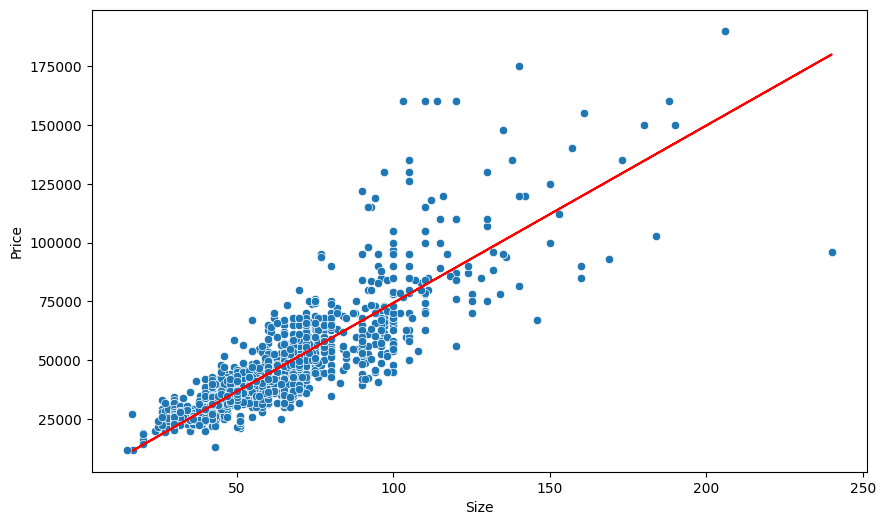

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred = LR_model.predict(x_test)

MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"{MAE = }")
print(f"{RMSE = }")

MAE = 7796.767463621409
RMSE = np.float64(12812.549962713074)


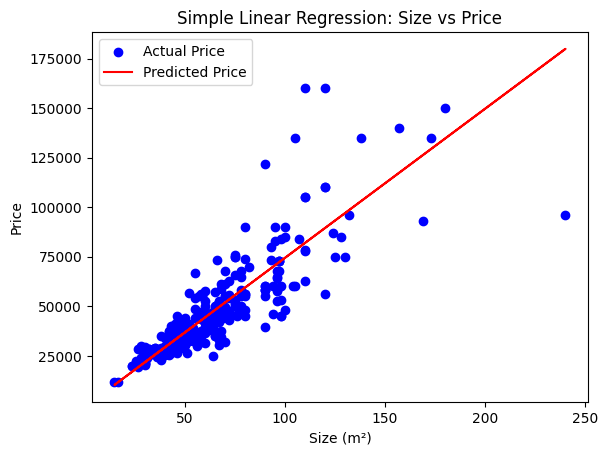

In [50]:
# Vizualizatsiya
plt.scatter(x_test, y_test, color='blue', label='Actual Price')
plt.plot(x_test, y_pred, color='red', label='Predicted Price')
plt.xlabel("Size (m²)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Size vs Price")
plt.legend()
plt.show()

In [52]:
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
